In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\machine learning\heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [6]:
numeric_var=['age','trtbps','chol','thalachh','oldpeak']
categorical_var=['sex','cp','fbs','restecg','exng','slp','caa','thall','output']

In [7]:
df[numeric_var].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

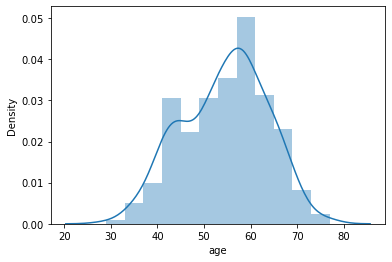

In [8]:
sns.distplot(df['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trtbps', ylabel='Density'>

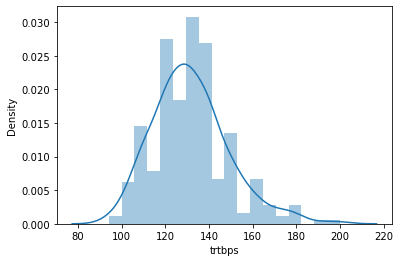

In [9]:
sns.distplot(df['trtbps'])

# feature scaling

In [10]:
from sklearn.preprocessing import RobustScaler

In [11]:
robust_scaler=RobustScaler()

In [12]:
scaler_data=robust_scaler.fit_transform(df[numeric_var])

In [13]:
scaler_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [14]:
type(scaler_data)

numpy.ndarray

In [15]:
# scaling help to regulization of the data

In [16]:
data_scaled=pd.DataFrame(scaler_data,columns=numeric_var)

In [17]:
data_scaled

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [18]:
data_new2=pd.concat([data_scaled,df[categorical_var]],axis=1)

In [19]:
data_new2

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


In [20]:
# heatmap over the data

<AxesSubplot:>

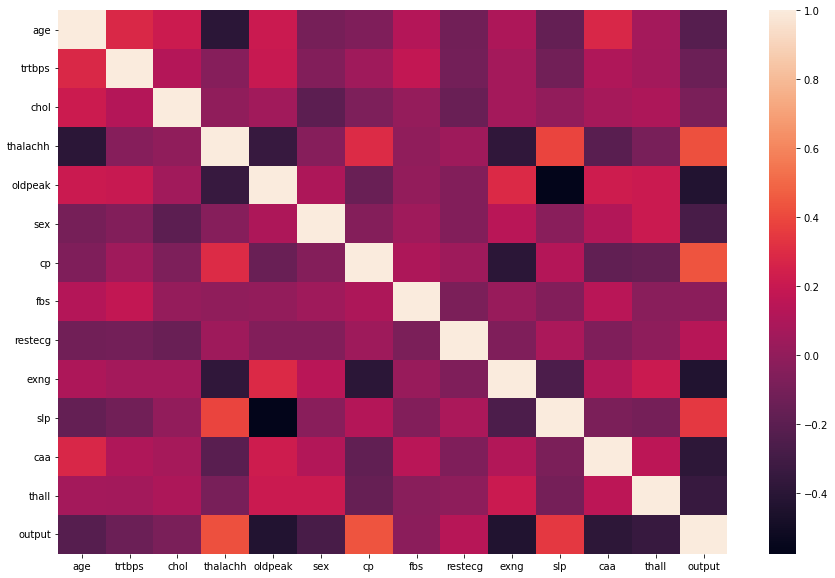

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(data_new2.corr())

<AxesSubplot:>

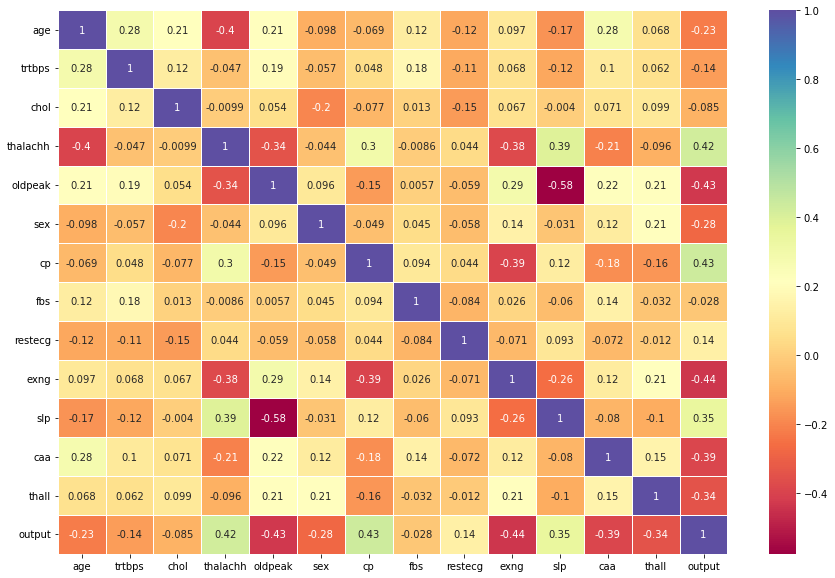

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data_new2.corr(),cmap='Spectral',annot=True,linewidth=0.5)

In [23]:
# chol
# fbs
# retecg

In [24]:
def correlation(dataset,threshold):
    col_corr=set()
# set of all the correlated columns 
    corr_matrix=data_new2.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs (corr_matrix.iloc[i,j])>threshold:# we are interested in absalute coeff value
                colname=corr_matrix.columns[i]# getting  the name of columns
                col_corr.add(colname)
    return col_corr           

In [25]:
corr_features=correlation(data_new2,0.5)

In [26]:
len(set(corr_features))

1

In [27]:
corr_features

{'slp'}

In [28]:
data_new2.drop(['slp'],axis=1,inplace=True)

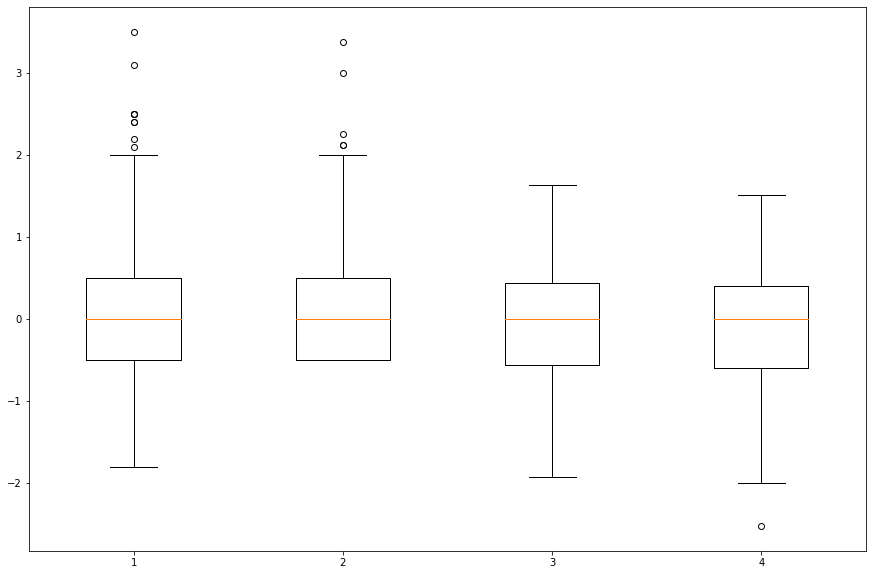

In [30]:
plt.figure(figsize=(15,10))

plt.boxplot(data_new2[['trtbps','oldpeak','age','thalachh']])

plt.show()

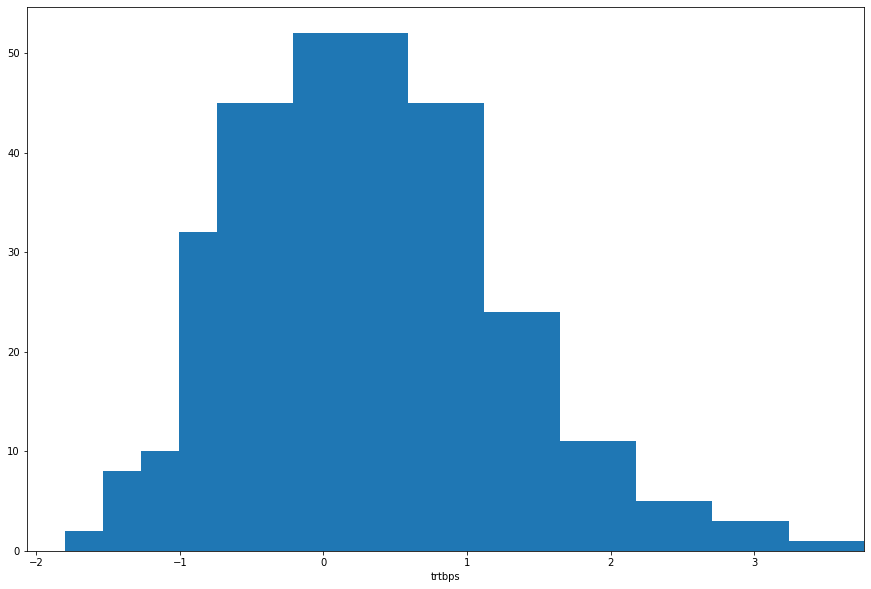

In [31]:
plt.figure(figsize=(15,10))
plt.hist(data_new2.trtbps,bins=20,width=0.8)
plt.xlabel('trtbps')
plt.show()

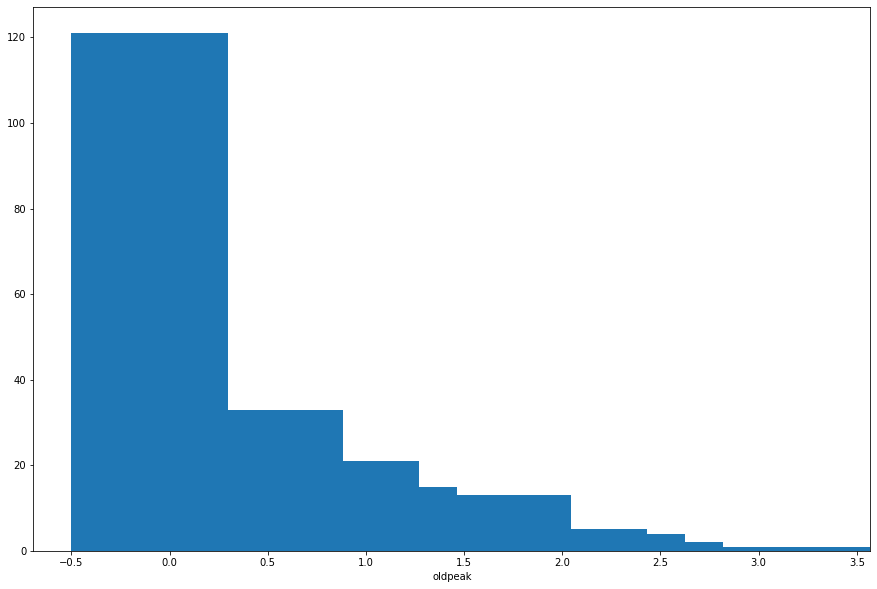

In [32]:
plt.figure(figsize=(15,10))
plt.hist(data_new2['oldpeak'],bins=20,width=0.8)
plt.xlabel('oldpeak')
plt.show()

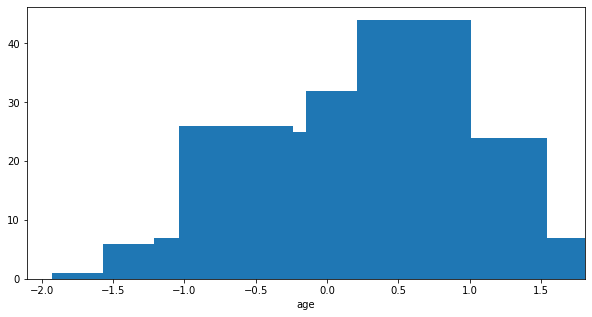

In [33]:
plt.figure(figsize=(10,5))
plt.hist(data_new2['age'],bins=20,width=0.8)
plt.xlabel('age')
plt.show()

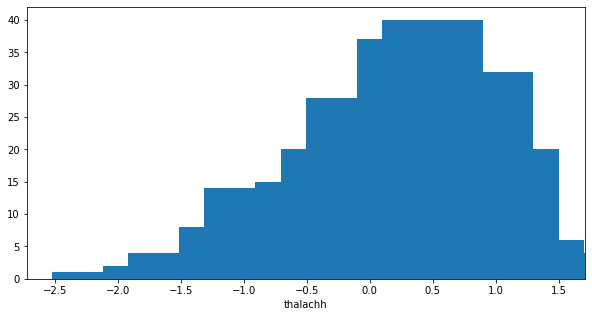

In [34]:
plt.figure(figsize=(10,5))
plt.hist(data_new2['thalachh'],bins=20,width=0.8)
plt.xlabel('thalachh')
plt.show()

In [35]:
def zscore_outlier(x,lb,ub):
    zscore=((x-x.mean())/x.std()).copy()
    result_=pd.series([0]*len(x))
    result_[((zscore<lb)|(zscore.ub))]=1
    return_results_

In [43]:
upper =data_new2.age.mean()+3*data_new2.age.std()
lower =data_new2.age.mean()-3*data_new2.age.std()
upper_trtbps =data_new2.trtbps.mean()+3*data_new2.trtbps.std()
lower_trtbps =data_new2.trtbps.mean()-3*data_new2.trtbps.std()
upper_chol =data_new2.chol.mean()+3*data_new2.chol.std()
lower_chol =data_new2.chol.mean()-3*data_new2.chol.std()
upper_thalachh =data_new2.thalachh.mean()+3*data_new2.thalachh.std()
lower_thalachh =data_new2.thalachh.mean()-3*data_new2.thalachh.std()
upper_oldpeak =data_new2.oldpeak.mean()+3*data_new2.oldpeak.std()
lower_oldpeak =data_new2.oldpeak.mean()-3*data_new2.sex.std()
upper_sex =data_new2.oldpeak.mean()+3*data_new2.sex.std()
lower_sex =data_new2.oldpeak.mean()-3*data_new2.oldpeak.std()
upper_cp =data_new2.oldpeak.mean()+3*data_new2.cp.std()
lower_cp =data_new2.oldpeak.mean()-3*data_new2.cp.std()
upper_fbs =data_new2.oldpeak.mean()+3*data_new2.fbs.std()
lower_fbs =data_new2.oldpeak.mean()-3*data_new2.fbs.std()
upper_exng =data_new2.oldpeak.mean()+3*data_new2.exng.std()
lower_exng =data_new2.oldpeak.mean()-3*data_new2.exng.std()
upper_caa =data_new2.oldpeak.mean()+3*data_new2.caa.std()
lower_caa =data_new2.oldpeak.mean()-3*data_new2.caa.std()
upper_thall =data_new2.oldpeak.mean()+3*data_new2.thall.std()
lower_thall =data_new2.oldpeak.mean()-3*data_new2.thall.std()
upper_restecg =data_new2.oldpeak.mean()+3*data_new2.restecg.std()
lower_restecg =data_new2.oldpeak.mean()-3*data_new2.restecg.std()
upper_output =data_new2.oldpeak.mean()+3*data_new2.output.std()
lower_output =data_new2.oldpeak.mean()-3*data_new2.output.std()

In [44]:
upper

1.9713066372723647

In [45]:
lower

-2.065182691544458

In [46]:
#removing those outlier
data_new3=data_new2[(data_new2.age<upper_age)&(data_new2.age>lower_age)]

In [47]:
data_new3

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,caa,thall,output
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,3,0


In [48]:
#how we cap our data

In [49]:
data_new2['age']=np.where(
            data_new2['age']>upper,
            upper,
            np.where(
                data_new2['age']<lower,
                lower,
                data_new2['age']
            )
 )

In [50]:
upper_all=data_new2.mean()+3*data_new2.std()
lower_all=data_new2.mean()-3*data_new2.std()

In [51]:
upper_all

age         1.971307
trtbps      2.711910
chol        2.547343
thalachh    2.011149
oldpeak     2.326768
sex         2.081201
cp          4.063154
fbs         1.217108
restecg     2.105632
exng        1.736116
caa         3.797192
thall       4.150361
output      2.041059
dtype: float64

In [52]:
lower_all

age        -2.065183
trtbps     -2.549533
chol       -2.350051
thalachh   -2.217496
oldpeak    -2.027263
sex        -0.714864
cp         -2.129161
fbs        -0.920079
restecg    -1.049526
exng       -1.082651
caa        -2.338446
thall       0.476702
output     -0.951950
dtype: float64